"Geo Data Science with Python" 
### Exercise 8b

# Singular Value Decomosition (SVD) and Principal Component Analysis (PCA)




---

# Homework

Perform a singular value decomposition (SVD/PCA) and extract the major temporal and spatial components for the `tos` data, after excluding the land areas. Comment your results and submit everything in a notebook of the name `Exercise07b.ipynb`.

In [1]:
# importing the required modules
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# assigning relevant data arrays to their corresponding variables 
data = Dataset('./tos_O1_2001-2002.nc')
lat = data.variables['lat'][:].data
lon = data.variables['lon'][:].data
time = data.variables['time'][:].data
tos = data.variables['tos'][:].data

# converting temps to degree C
tos = tos - 273.15 

# closing the data file
data.close()




In [3]:
# converting the temp data into a 2D array and transposing 
lenTime, lenLat, lenLon = tos.shape
tos_2D = tos.reshape((24, lenLon*lenLat))
tos_2D = tos_2D.transpose ()
tos_2D.shape

(30600, 24)

In [4]:
# creating a mask for the ocean data that assings 0 values to the fill data (land)
mask_Ocean = tos_2D[:,0] < 1e20
mask_Land = ~mask_Ocean
ocean_2D = tos_2D[mask_Ocean,:]

In [5]:
# Performing SVD 
U, S, Vt = np.linalg.svd (ocean_2D, full_matrices = 0)

In [6]:
# creating a zero array that has the same matrix dimensions as the original array
tos_out_2D = np.zeros(tos_2D.shape)

# putting the ocean and land data back into an array of the original mattrix sign 
tos_out_2D [mask_Ocean, :] = U
tos_out_2D [mask_Land, :] = np.nan

In [7]:
# checking contents 
tos_out_2D

array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [ 6.51890237e-04, -1.83127213e-05,  2.10049384e-05, ...,
         5.53838872e-05,  4.97744695e-05,  8.03899777e-04],
       [ 6.51884417e-04, -1.82870663e-05,  2.11240294e-05, ...,
         5.25977703e-05,  5.00320057e-05,  8.05022253e-04],
       [ 6.51880458e-04, -1.82684435e-05,  2.13064523e-05, ...,
         5.19951645e-05,  5.01238683e-05,  8.05885356e-04]])

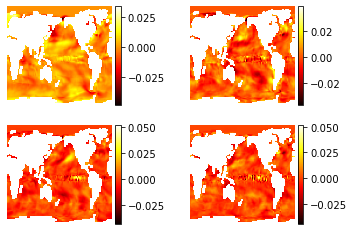

In [8]:
# plotting the spatial trends at 6 month intervals

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)  # reshapes 2d axes array into a 1d array (for easier indexing)
timeInt = [6,12,18,23]
for j in timeInt:
    tos_out = np.flipud(np.reshape(tos_out_2D[:,j],(lenLat,lenLon)))
    tos2D_compressed = tos_out[::2,::2]  # get only every second pixel, for smaller image size
    im = axs[timeInt.index(j)].imshow(tos2D_compressed,cmap='hot')
    axs[timeInt.index(j)].axis('off')
    # following lines add colorbar to each subplot
    divider = make_axes_locatable(axs[timeInt.index(j)])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical');

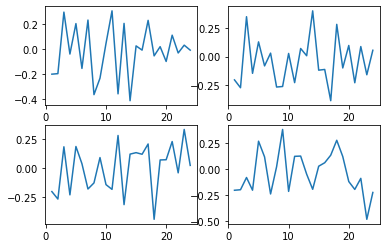

In [9]:
# plotting temporal trends, also at 6 month intervals

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
timeInt = [6,12,18,24]
for j in timeInt:
    tosOut = Vt[:,timeInt.index(j)]
    im = axs[timeInt.index(j)].plot(range(1,len(tosOut)+1),tosOut)


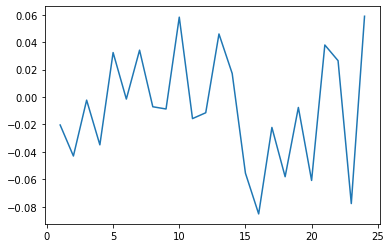

In [10]:
# global mean tos

fig = plt.subplots(1)
im = plt.plot(range(1,25),np.mean(Vt,0))

In [11]:
# ! git status